<h1>Unscript Rookies Hackathon 2k22</h1>

<h2>Importing the Libraries</h2>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

<h2>Importing the Dataset</h2>

In [5]:
dataset = pd.read_csv("AIML Dataset.csv")

<h2>Data Analysis</h2>

<h3>Checking the types of data</h3>

In [10]:
dataset.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

<h3>Checking for any null values</h3>

In [6]:
dataset.isnull().values.any()

False

There are no Null values in the Dataset.

<h3>Data Description</h3>

In [35]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [33]:
dataset.describe(include = 'object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


<h3>Frequencies of Transaction types</h3>

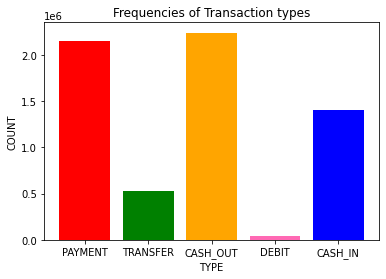

In [25]:
x_type = list(dataset.type.drop_duplicates().values)
y_type = [len(dataset.loc[(dataset.type == i)]) for i in x_type]
c = ["red", "green", "orange", "hotpink", "blue"]
plt.bar(x_type,y_type, color=c)
plt.title("Frequencies of Transaction types")
plt.xlabel("TYPE")
plt.ylabel("COUNT")
plt.show()

<h3>Checking for fraud transactions</h3>

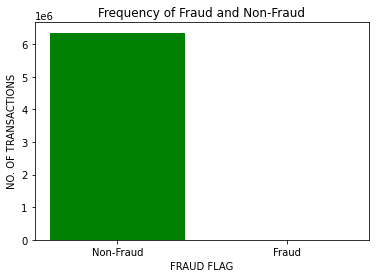

Fraud: 8213
Non-Fraud: 6354407


In [48]:
x_fraud = ["Non-Fraud", "Fraud"]
y_fraud = [len(dataset.loc[(dataset.isFraud == 0)]), len(dataset.loc[(dataset.isFraud == 1)])]
plt.bar(x_fraud, y_fraud, color=["green", "red"])
plt.title("Frequency of Fraud and Non-Fraud")
plt.xlabel("FRAUD FLAG")
plt.ylabel("NO. OF TRANSACTIONS")
plt.show()
print(f"Fraud: {y_fraud[1]}\nNon-Fraud: {y_fraud[0]}")

In [8]:
fraud_type = list(dataset.loc[dataset.isFraud == 1].type.drop_duplicates().values)
print(f"The Fraudulent transactions are of the type - {fraud_type}")

The Fraudulent transactions are of the type - ['TRANSFER', 'CASH_OUT']


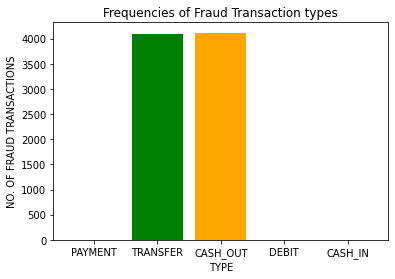

In [26]:
x_fraud_type = list(dataset.type.drop_duplicates().values)
y_fraud_type = [len(dataset.loc[(dataset.isFraud == 1) & (dataset.type == i)]) for i in x_fraud_type]
plt.bar(x_fraud_type, y_fraud_type, color=c)
plt.title("Frequencies of Fraud Transaction types")
plt.xlabel("TYPE")
plt.ylabel("NO. OF FRAUD TRANSACTIONS")
plt.show()

In [13]:
fraud_transfer = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'TRANSFER')]
fraud_cash_out = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'CASH_OUT')]
print(f"The number of fraudulent TRANSFERs = {len(fraud_transfer)}")
print(f"The number of fraudulent CASH_OUTs = {len(fraud_cash_out)}")

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


Therefore only CASH-OUT and TRANSFER transactions can be fraudulent.<br>
Also there is an almost equal likelihood that a fraudulent transaction can be CASH_OUT or TRANSFER.

<h4>Retaining only CASH-OUT and TRANSFER transactions</h4>

In [29]:
data = dataset.loc[dataset['type'].isin(['CASH_OUT', 'TRANSFER']),:]
print('The new data now has', len(data), 'transactions.')

The new data now has 2770409 transactions.


Therefore, we managed to reduce the data from over 60 lakhs transactions to ~28 lakhs transactions.